In [1]:
import numpy as np
from keras.datasets import mnist

In [2]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


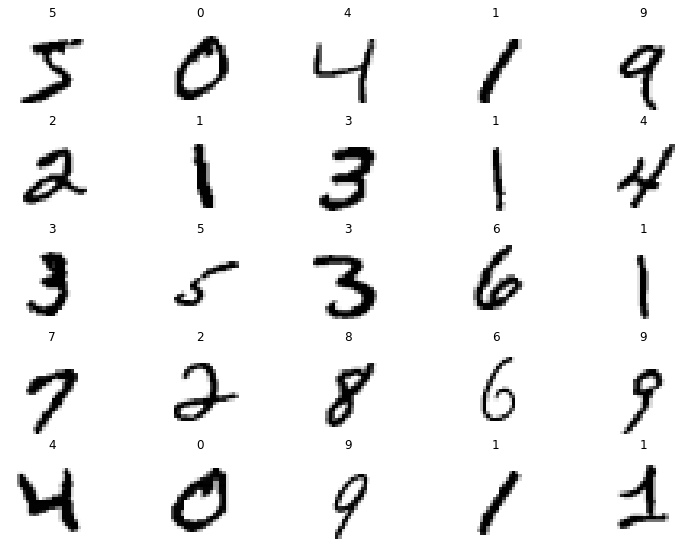

In [3]:
import matplotlib.pyplot as plt

# visualize data
plt.figure(figsize=(6.4 * 2, 4.8 * 2))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap="binary")
    plt.axis('off')
    plt.title(y_train[i])

plt.show()

In [4]:
# standardize X
X_train = X_train / 255
X_test = X_test / 255

In [5]:
from keras.utils import np_utils

# convert y into one-hot
y_train_oh = np_utils.to_categorical(y_train, num_classes=10)
y_test_oh = np_utils.to_categorical(y_test, num_classes=10)

print(y_train[:5])
print(y_train_oh[:5])
print('-------')
print(y_test[:5])
print(y_test_oh[:5])

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
-------
[7 2 1 0 4]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [6]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# define model
rnn_model = Sequential()
# add rnn layer
rnn_model.add(SimpleRNN(units=50, input_shape=(28, 28), activation='relu'))
# add output layer
rnn_model.add(Dense(units=10, activation='softmax'))
# configure the model
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                3950      
_________________________________________________________________
dense (Dense)                (None, 10)                510       
Total params: 4,460
Trainable params: 4,460
Non-trainable params: 0
_________________________________________________________________


In [7]:
rnn_model.fit(X_train, y_train_oh, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 1.2682 - accuracy: 0.5386

In [8]:
# evaluate the model based on training data
loss, accuracy = rnn_model.evaluate(X_train, y_train_oh)
print('loss:', loss)
print('accuracy:', accuracy)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.1419 - accuracy: 0.9593

In [9]:
# evaluate the model based on test data
loss, accuracy = rnn_model.evaluate(X_test, y_test_oh)
print('loss:', loss)
print('accuracy:', accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1527 - accuracy: 0.9563

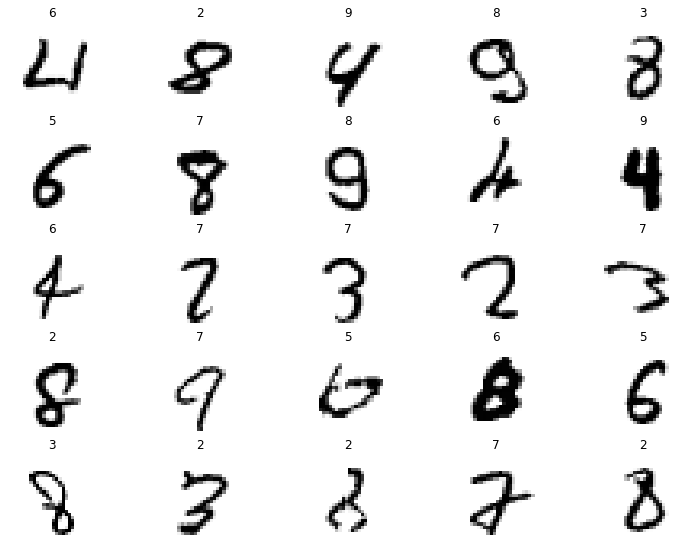

In [10]:
# find mistakes

y_test_predict = rnn_model.predict(X_test)
y_test_predict = np.argmax(y_test_predict, axis=1)

count = 1
plt.figure(figsize=(6.4 * 2, 4.8 * 2))
for i, X_i in enumerate(X_test):
    if y_test[i] != y_test_predict[i]:
        plt.subplot(5, 5, count)
        plt.imshow(X_i, cmap="binary")
        plt.axis('off')
        plt.title(y_test_predict[i])
        count += 1
        if count == 26:
            break
plt.show()